In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [4]:
data = {
    'X' : [1,2,3,4,5,6,7,8,9,10],
    'Y' : [2,4,6,8,10,12,14,16,18,50]
}

In [5]:
df = pd.DataFrame(data)

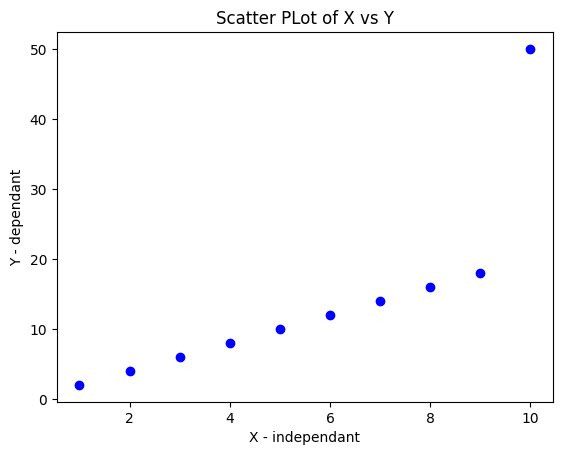

In [6]:
plt.scatter(df['X'],df['Y'],color = 'blue')
plt.title('Scatter PLot of X vs Y')
plt.xlabel('X - independant')
plt.ylabel("Y - dependant")
plt.show()

In [7]:
mean_y = np.mean(df['Y'])
std_y = np.std(df['Y'])
treshold = 2.7774599
outliers = df[np.abs(df['Y'] - mean_y) > treshold * std_y]
print("Outliers : \n ",outliers)

Outliers : 
      X   Y
9  10  50


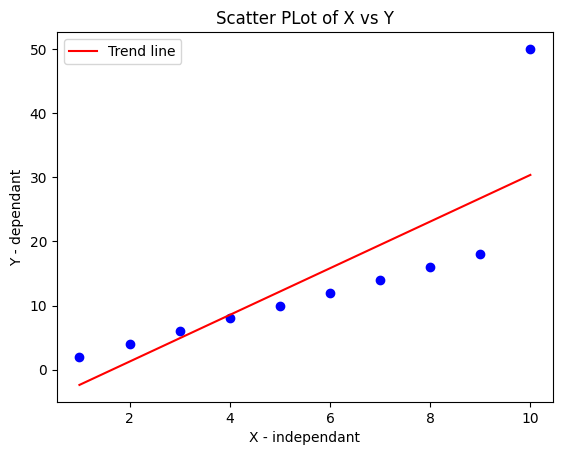

In [8]:
m,b = np.polyfit(df['X'], df['Y'],1)
plt.scatter(df['X'],df['Y'],color = 'blue')
plt.plot(df['X'], m*df['X']+ b, color = 'red',label = 'Trend line')
plt.title('Scatter PLot of X vs Y')
plt.xlabel('X - independant')
plt.ylabel("Y - dependant")
plt.legend()
plt.show()

In [9]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination = 0.1)
df['outlier'] = model.fit_predict(df[['X','Y']])
print(df['outlier'] )

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9   -1
Name: outlier, dtype: int32


In [10]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 5, min_samples = 5 )
df['outlier'] = model.fit_predict(df[['X','Y']])
print(df['outlier'] )

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9   -1
Name: outlier, dtype: int64


In [11]:
# Import necessary libraries
import numpy as np # For numerical computations
import pandas as pd # For handling tabular data
# Set a random seed for reproducibility
np . random . seed (42)
# Generate 1000 samples for true values centered around 50
#with a standard deviation of 10
true_values = np . random . normal ( loc =50 , scale =10 , size =1000)
# Add noise to generate predicted values based on true values
predicted_values = true_values + np . random . normal ( loc =0 ,
scale =5 , size =1000)
true_values [::50] += np . random . normal ( loc =20 , scale =10 , size
=20)
predicted_values [::50] += np . random . normal ( loc =20 , scale =10 ,
size =20)
# Combine the data into a DataFrame
data = pd . DataFrame ({
'True ': true_values ,
'Predicted ': predicted_values
})

ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

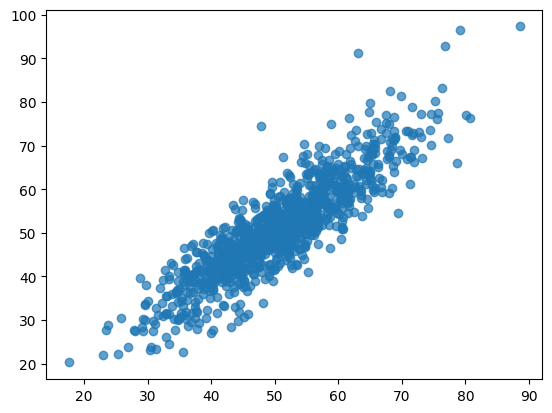

In [12]:
import matplotlib . pyplot as plt # For plotting
from scipy . stats import zscore # For calculating Z- Score
def scatter_plot_with_outliers ( data ) :
    plt . figure ( figsize =(10 , 6) ) # Set figure size
# Scatter plot for all data points
plt . scatter ( data ['True '] , data ['Predicted '] , alpha =0.7 ,
label ='Data ␣ Points ')
# Calculate Z- Scores for outlier detection
z_scores = zscore ( data [[ 'True ', 'Predicted ']])
outliers = np .abs( z_scores ) > 3 # Identify outliers with
#Z- Score > 3
# Highlight outliers in red
plt . scatter ( data ['True '][ outliers .any( axis =1) ] ,
data ['Predicted '][ outliers .any ( axis =1) ] ,color ='red ', label ='Outliers ')

# Add labels , legend , and grid
plt . title (" Scatter ␣ Plot ␣ with ␣ Outliers ␣ Marked ")
plt . xlabel (" True ␣ Values ")
plt . ylabel (" Predicted ␣ Values ")
plt . legend ()
plt . grid ()
plt . show ()
# Call the function to plot
scatter_plot_with_outliers ( data )

In [55]:
import pandas as pd
from collections import Counter

# Load the dataset
data = pd.read_csv("student_data.csv")

# Convert the column to a DataFrame
df = pd.DataFrame(data['Student Test Marks'])

# Filter high and low marks
high = df[df > 50].dropna()
low = df[df <= 50].dropna()

# Count occurrences
print("High Marks Distribution:", Counter(high['Student Test Marks']))
print("Low Marks Distribution:", Counter(low['Student Test Marks']))


High Marks Distribution: Counter({61.0: 5, 96.0: 4, 69.0: 4, 58.0: 4, 91.0: 3, 95.0: 3, 51.0: 3, 74.0: 2, 88.0: 2, 55.0: 2, 89.0: 2, 76.0: 1, 71.0: 1, 78.0: 1, 87.0: 1, 57.0: 1, 80.0: 1, 53.0: 1, 86.0: 1, 52.0: 1, 67.0: 1, 54.0: 1, 68.0: 1, 97.0: 1, 85.0: 1, 72.0: 1, 79.0: 1, 92.0: 1, 66.0: 1, 70.0: 1, 81.0: 1, 56.0: 1, 93.0: 1, 98.0: 1})
Low Marks Distribution: Counter({1.0: 4, 0.0: 3, 2.0: 3, 31.0: 3, 18.0: 3, 26.0: 2, 43.0: 2, 23.0: 2, 38.0: 2, 10.0: 2, 19.0: 2, 8.0: 1, 36.0: 1, 50.0: 1, 11.0: 1, 16.0: 1, 37.0: 1, 15.0: 1, 35.0: 1, 32.0: 1, 39.0: 1, 49.0: 1, 22.0: 1, 30.0: 1, 41.0: 1, 6.0: 1})


In [59]:
# Encode high marks as 1 and low marks as 0
df['Label'] = df['Student Test Marks'].apply(lambda x: 1 if x > 50 else 0)
print(df.head())
Counter(df['Label'])


   Student Test Marks  Label
0                  61      1
1                  74      1
2                  91      1
3                  88      1
4                  61      1


Counter({1: 57, 0: 43})

In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Features (X) and Labels (y)
X = df[['Student Test Marks']]  # Independent variable
y = df['Label']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Count after oversampling
print("Class Distribution After Oversampling:", Counter(y_resampled))


Class Distribution After Oversampling: Counter({1: 47, 0: 47})
